In [48]:
import pandas as pd
from statsmodels.datasets import get_rdataset
import matplotlib.pyplot as plt
import numpy as np

In [3]:
USArrests = get_rdataset('USArrests').data
print(USArrests.shape)
USArrests.head()

(50, 4)


,Murder,Assault,UrbanPop,Rape
rownames,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [11]:
print(USArrests.describe().T, '\n\n')

print(f'Variance of columns\n{USArrests.var()}')

          count     mean        std   min      25%     50%      75%    max
Murder     50.0    7.788   4.355510   0.8    4.075    7.25   11.250   17.4
Assault    50.0  170.760  83.337661  45.0  109.000  159.00  249.000  337.0
UrbanPop   50.0   65.540  14.474763  32.0   54.500   66.00   77.750   91.0
Rape       50.0   21.232   9.366385   7.3   15.075   20.10   26.175   46.0 


Variance of columns
Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64


Varyansları incelediğimizde değişkenler arasındaki varyans farkının çok yüksek olduğunu görmekteyiz. Bu durum **PCA** kullanırken **scaler** kullanmazsak yanlış sonuçlar elde etmemize neden olacaktır. Çünkü PCA temelinde bağımsız değişkenlerin, bağımlı değişkendeki ne kadarlık varyansa karşılık geldiğini belirler, bu açıdan baktığımızda kendi içerisinde çok büyük değişkenlik gösteren **Assault** değişkeni PCA sonuçlarımızı yanıltacaktır. _Bu nedenle PCA kullanmadan önce bu tarz durumlarda mutlaka scaler kullanılması gerekmektedir._

>So if the variables are measured in different units or vary widely in scale, it is recommended to standardize the variables to have standard deviation one before performing PCA. Typically we set the means to zero as well.


In [16]:
from sklearn.preprocessing import StandardScaler
StandardScaler?

Init signature: StandardScaler(*, copy=True, with_mean=True, with_std=True)
Docstring:     
Standardize features by removing the mean and scaling to unit variance.

The standard score of a sample `x` is calculated as:

    z = (x - u) / s

where `u` is the mean of the training samples or zero if `with_mean=False`,
and `s` is the standard deviation of the training samples or one if
`with_std=False`.

Centering and scaling happen independently on each feature by computing
the relevant statistics on the samples in the training set. Mean and
standard deviation are then stored to be used on later data using
:meth:`transform`.

Standardization of a dataset is a common requirement for many
machine learning estimators: they might behave badly if the
individual features do not more or less look like standard normally
distributed data (e.g. Gaussian with 0 mean and unit variance).

For instance many elements used in the objective function of
a learning algorithm (such as the RBF kernel of Suppor

In [22]:
scaler = StandardScaler(with_mean=True,
                        with_std=True)

USArrests_scaled = scaler.fit_transform(USArrests)

In [23]:
from sklearn.decomposition import PCA

PCA?

Init signature:
PCA(
    n_components=None,
    *,
    copy=True,
    whiten=False,
    svd_solver='auto',
    tol=0.0,
    iterated_power='auto',
    n_oversamples=10,
    power_iteration_normalizer='auto',
    random_state=None,
)
Docstring:     
Principal component analysis (PCA).

Linear dimensionality reduction using Singular Value Decomposition of the
data to project it to a lower dimensional space. The input data is centered
but not scaled for each feature before applying the SVD.

It uses the LAPACK implementation of the full SVD or a randomized truncated
SVD by the method of Halko et al. 2009, depending on the shape of the input
data and the number of components to extract.

With sparse inputs, the ARPACK implementation of the truncated SVD can be
used (i.e. through :func:`scipy.sparse.linalg.svds`). Alternatively, one
may consider :class:`TruncatedSVD` where the data are not centered.

Notice that this class only supports sparse inputs for some solvers such as
"arpack" and "c

In [27]:
pca = PCA()

pca.fit(USArrests_scaled)
print(pca.mean_)

scores = pca.transform(USArrests_scaled)
print(pca.components_)

[-7.10542736e-17  1.38777878e-16 -4.39648318e-16  8.59312621e-16]
[[ 0.53589947  0.58318363  0.27819087  0.54343209]
 [-0.41818087 -0.1879856   0.87280619  0.16731864]
 [-0.34123273 -0.26814843 -0.37801579  0.81777791]
 [-0.6492278   0.74340748 -0.13387773 -0.08902432]]


PCA sonuçlarını görselleştirmek için genellikle **biplot** kullanılıyor, bunun için aşağıda küçük bir biplot oluşturalım.

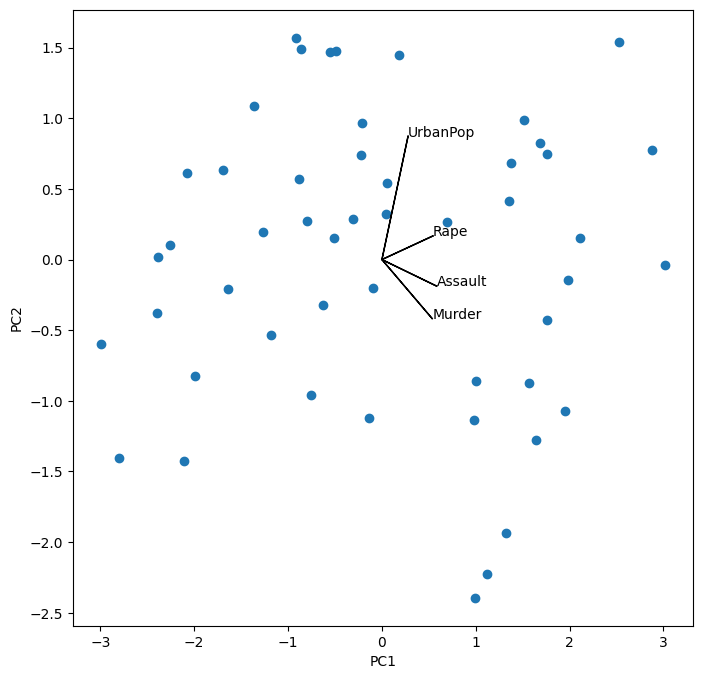

In [38]:
i, j = 0, 1
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.scatter(scores[:,0], scores[:,1])
ax.set_xlabel('PC%d' % (i+1))
ax.set_ylabel('PC%d' % (j+1))

for k in range(pca.components_.shape[1]):
    ax.arrow(0, 0, pca.components_[i, k], pca.components_[j, k])
    ax.text(pca.components_[i,k],
            pca.components_[j,k],
            USArrests.columns[k])

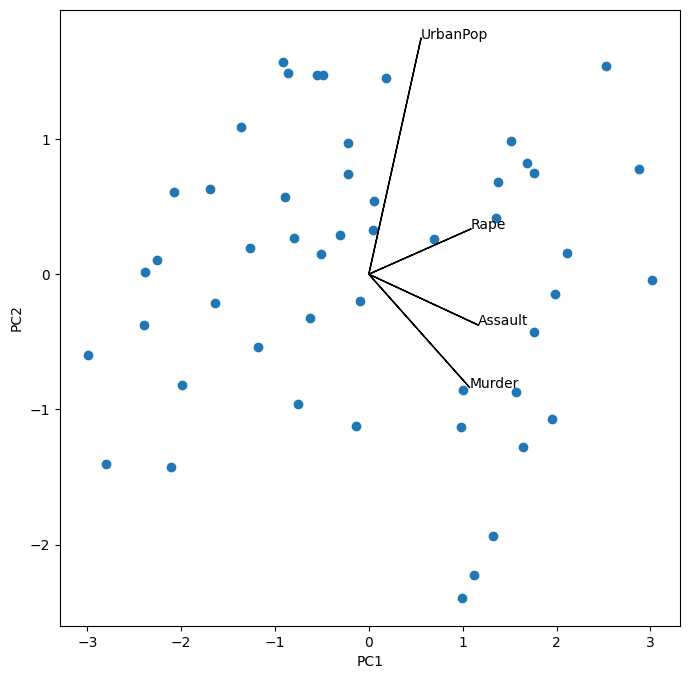

In [41]:
scale_arrow = s_ = 2
scores[:,1] *= -1
pca.components_[1] *= -1 # flip the y-axis 
fig, ax = plt.subplots(1, 1, figsize=(8, 8)) 
ax.scatter(scores[:,0], scores[:,1]) 
ax.set_xlabel('PC%d' % (i+1)) 
ax.set_ylabel('PC%d' % (j+1))
for k in range(pca.components_.shape[1]):
    ax.arrow(0, 0, s_*pca.components_[i,k], s_*pca.components_[ j,k])
    ax.text(s_*pca.components_[i,k], s_*pca.components_[j,k],
    USArrests.columns[k])

In [43]:
scores.std(0, ddof=1)

array([1.5908673 , 1.00496987, 0.6031915 , 0.4206774 ])

In [46]:
# Her bir değişkenin veri setindeki değişime ne kadar etkisi olduğunu görebiliyoruz.
print(pca.explained_variance_,'\n\n')

# Varyansı oransal olarak görmemizi sağlar
print(pca.explained_variance_ratio_)

[2.53085875 1.00996444 0.36383998 0.17696948] 


[0.62006039 0.24744129 0.0891408  0.04335752]


**Proportion of variance**'ı görselleştirelim

%%capture subplotlardan birisini çizdiğimizde, diğerini çizene kadar şekli saklamamızı sağlar, böylece subplotları iki farklı hücrede çizebiliyoruz.

In [53]:
%%capture
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
ticks = np.arange(len(pca.components_)) + 1
ax = axes[0]
ax.plot(ticks, pca.explained_variance_ratio_, marker='o')
ax.set_xlabel('Principal Component');
ax.set_ylabel('Proportion of Variance Explained')
ax.set_ylim([0, 1])
ax.set_xticks(ticks)

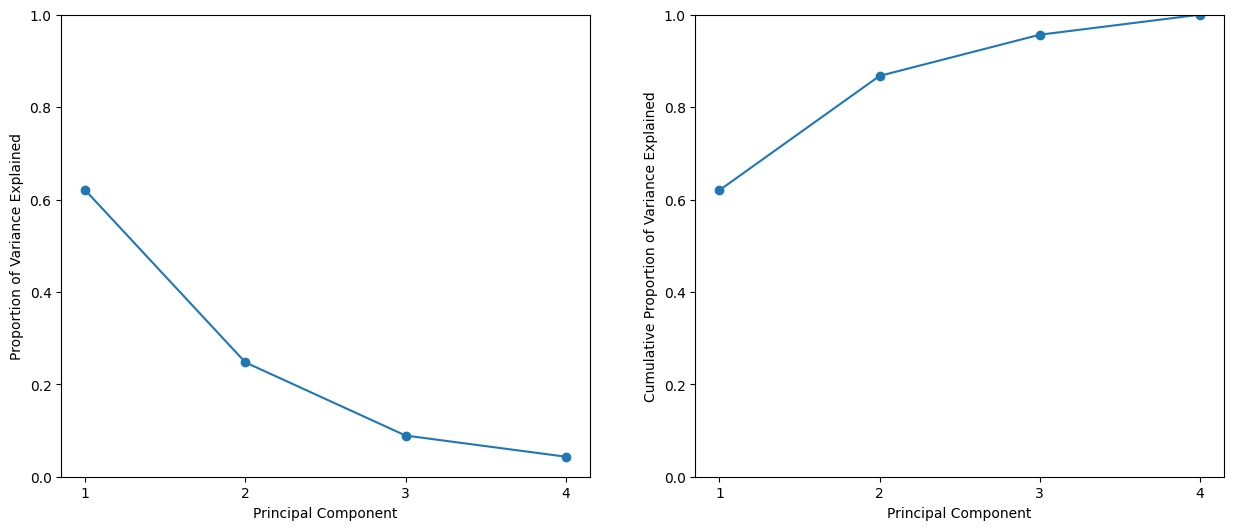

In [55]:
ax = axes[1] 
ax.plot(ticks,pca.explained_variance_ratio_.cumsum(), marker='o')
ax.set_xlabel('Principal Component') 
ax.set_ylabel('Cumulative Proportion of Variance Explained') 
ax.set_ylim([0, 1])
ax.set_xticks(ticks) 
fig